In [27]:
# %pip install seaborn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [30]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al    C4_pct_Eth    C4_pct_H2O       Decanol  \
count  61159.000000  61159.000000  61159.000000  61159.000000   
mean       6.150901      1.412307     21.464269      3.207301   
std        0.328437      2.886267      4.601483      1.769416   
min        0.155707      0.001000      0.057000      0.000000   
25%        6.006015      0.634871     18.891900      1.877315   
50%        6.145420      1.149110     21.471300      3.003040   
75%        6.306985      1.717620     23.318800      4.216670   
max        8.058320     77.165000     95.818000     10.000000   

       HydWtr_pct_Ammonia   HydWtr_Na2O       DI55102       DI55152  \
count        61159.000000  61159.000000  61159.000000  61159.000000   
mean             0.987535      0.942086      0.942241      0.932360   
std              0.206238      3.938009      0.054780      0.032130   
min              0.070270      0.000000      0.800002      0.809662   
25%              0.876533      0.457113      0.907766      0.911331   
50%              0.945000      0.672764      0.947371      0.932326   
75%              1.046155      0.993785      0.983351      0.952840   
max              3.744840    279.492000      1.133750      1.039590   

            FC55003       FC55009       FC55552       FC55569       FC55576  \
count  61159.000000  61159.000000  61159.000000  61159.000000  61159.000000   
mean    5968.009398    839.548854  35271.399107   6618.129111    378.220669   
std     1071.330751    613.193702   5755.805353    498.281362    257.782998   
min        0.000000      0.000000   8271.250000      0.000000      0.000000   
25%     5413.710000    300.414500  33517.050000   6334.540000    204.505500   
50%     5984.610000    817.753000  37890.400000   6575.930000    348.439000   
75%     6560.785000   1317.165000  39000.000000   6830.675000    558.258000   
max    16498.600000   2886.320000  52000.000000  10503.000000   1462.660000   

           FFC55555       LC90366       LC90368       PI55004       PI55020  \
count  61159.000000  61159.000000  61159.000000  61159.000000  61159.000000   
mean       0.771156     45.617849     36.630805      2.276041     -1.408937   
std        0.027712     28.814685     20.404145      1.326643      1.151305   
min        0.000000      0.000000      0.006367      0.001366     -6.302730   
25%        0.756506     20.180600     19.686300      1.264215     -2.297045   
50%        0.771584     46.355400     41.616300      1.961060     -1.372040   
75%        0.788113     76.736800     52.232050      3.098055     -0.389868   
max        0.998409     87.901600     81.210800     18.223000      3.374410   

            TC55552       TI55021  
count  61159.000000  61159.000000  
mean     168.230482    223.812307  
std       16.073462     11.442735  
min       98.687500     73.404200  
25%      155.438000    217.543000  
50%      172.438000    220.494000  
75%      180.688000    224.567000  
max      203.179000    344.636000

In [31]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 21


In [32]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [33]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
Decanol                      float64
HydWtr_pct_Ammonia           float64
HydWtr_Na2O                  float64
DI55102                      float64
DI55152                      float64
FC55003                      float64
FC55009                      float64
FC55552                      float64
FC55569                      float64
FC55576                      float64
FFC55555                     float64
LC90366                      float64
LC90368                      float64
PI55004                      float64
PI55020                      float64
TC55552                      float64
TI55021                      float64
dtype: object


Skipping datetime column: Date


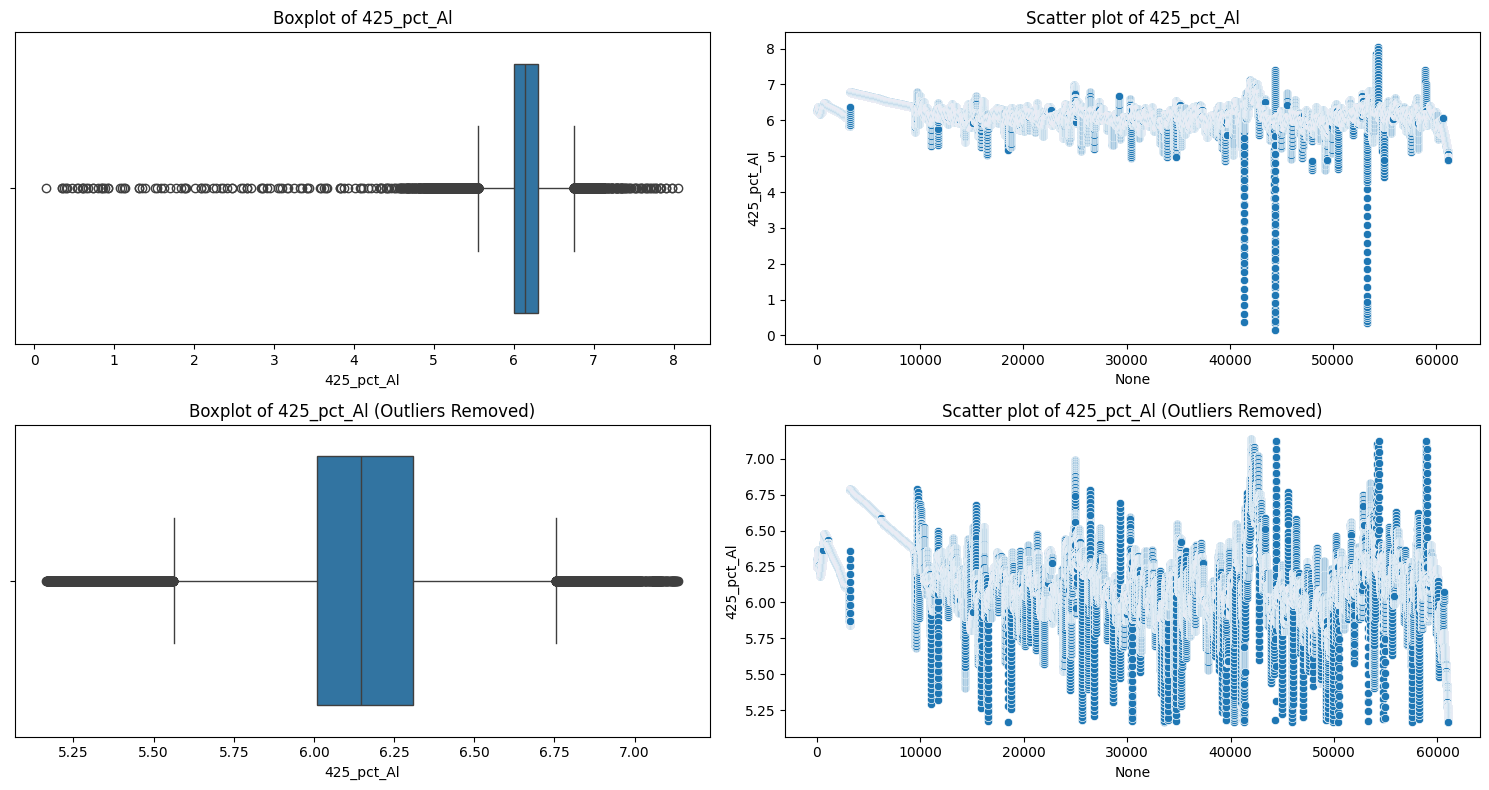

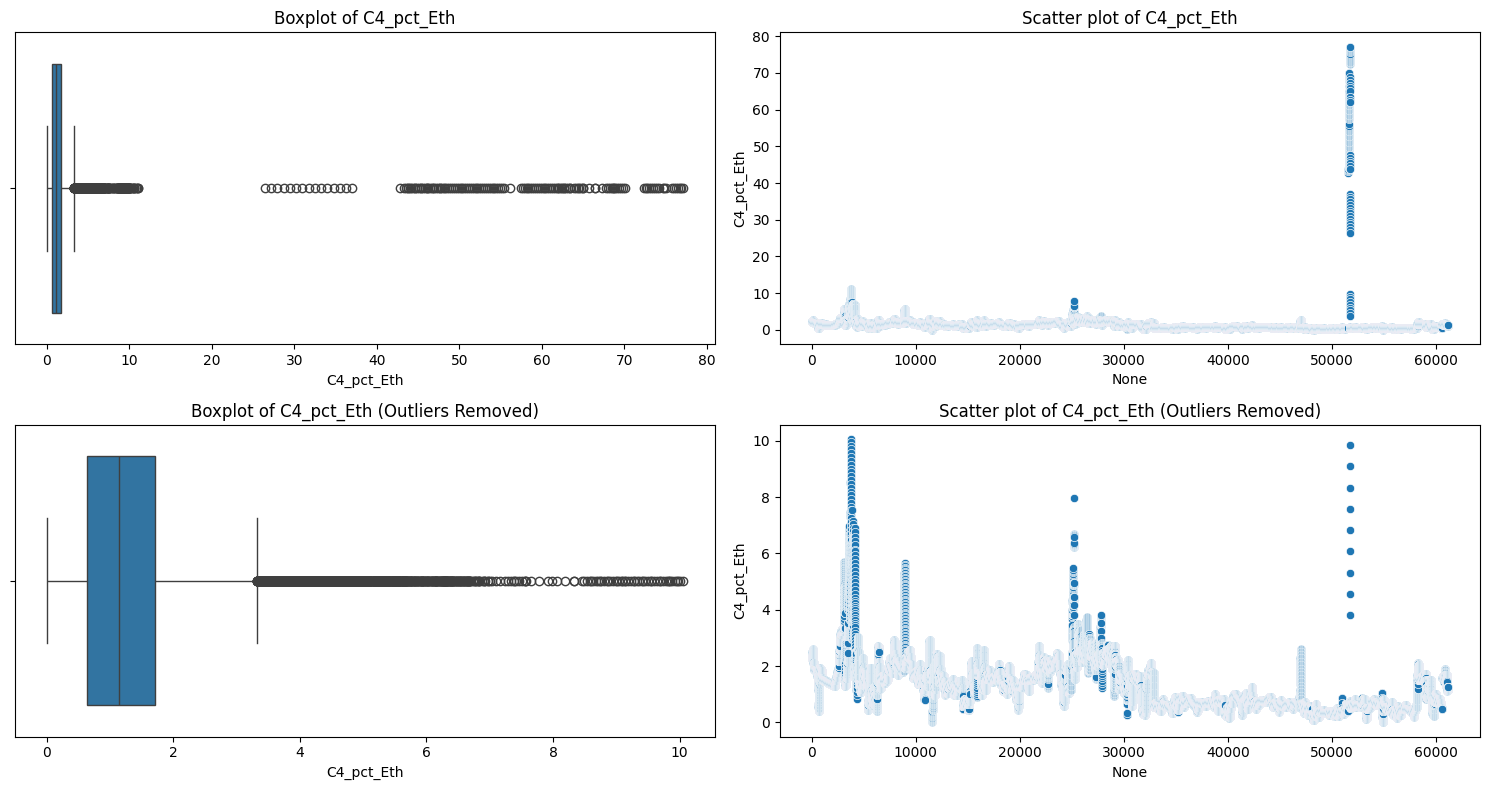

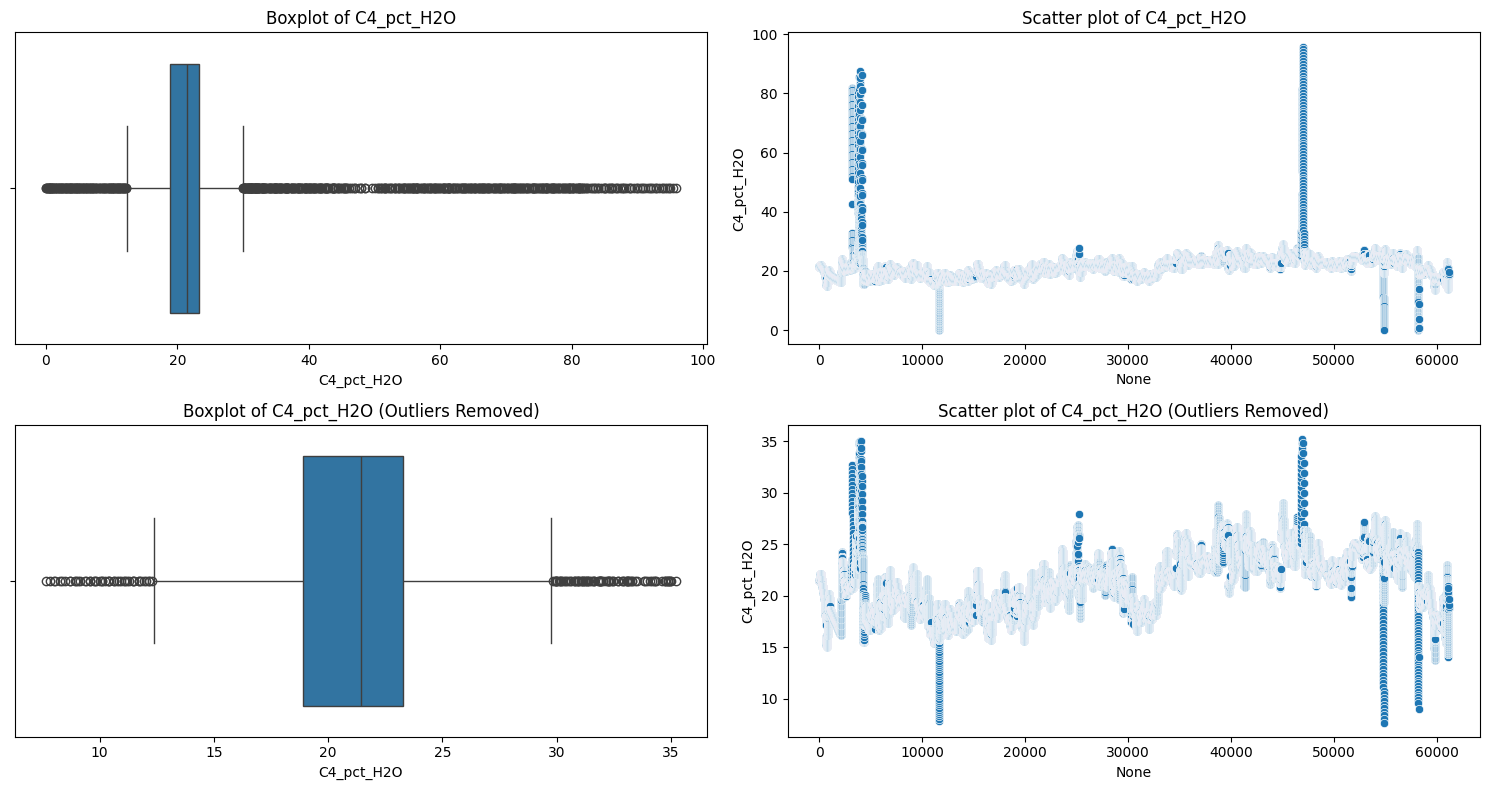

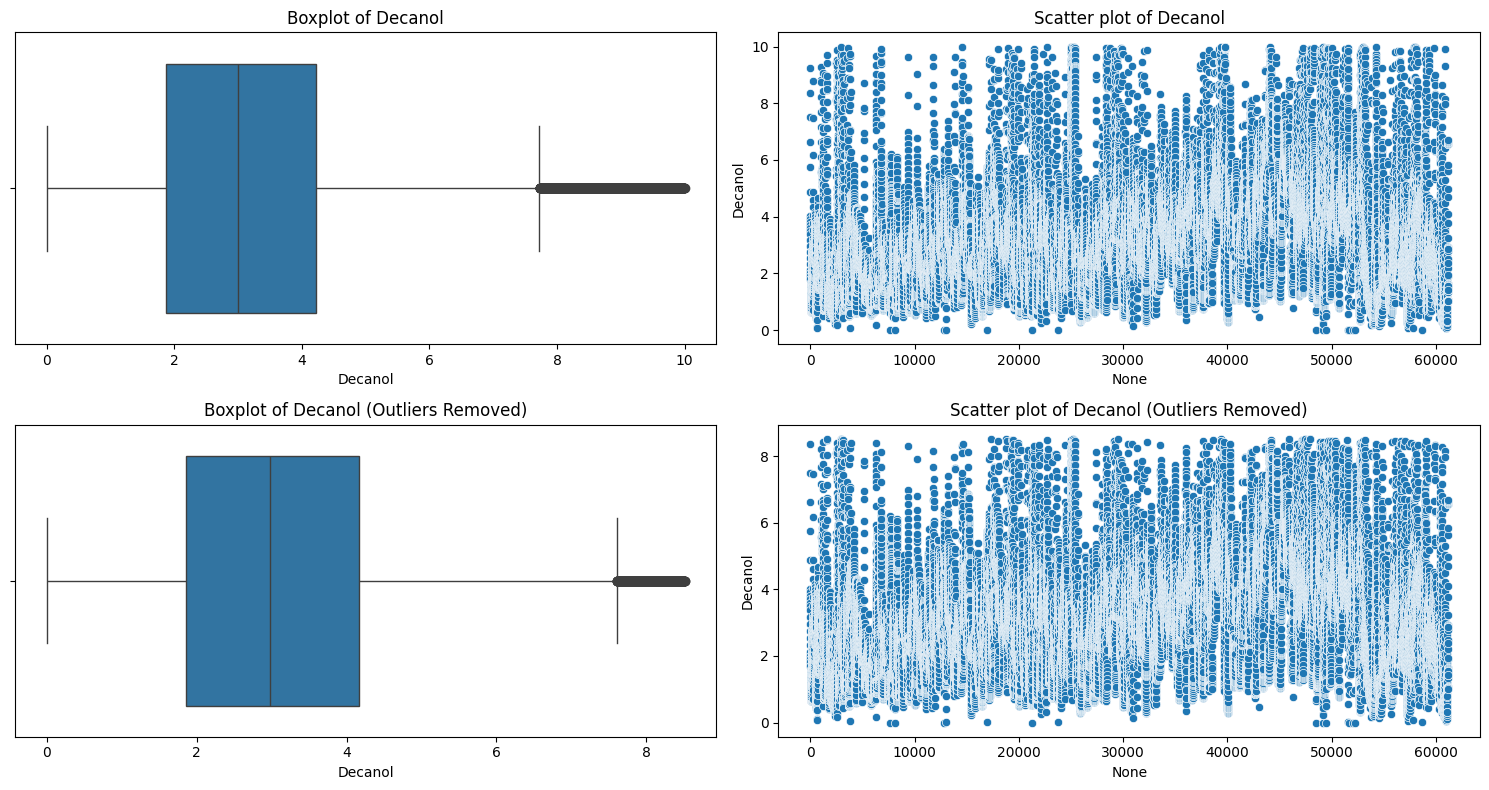

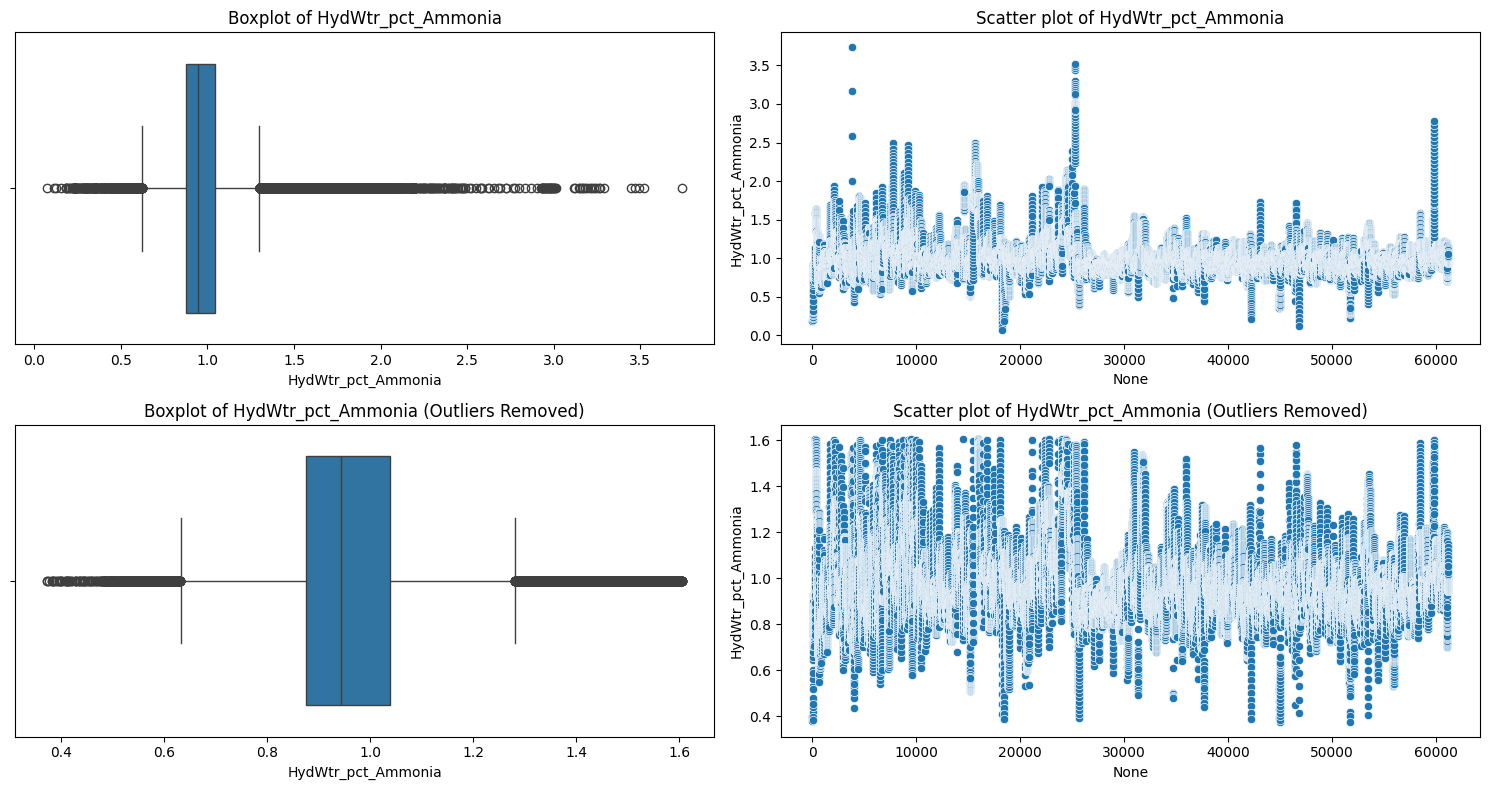

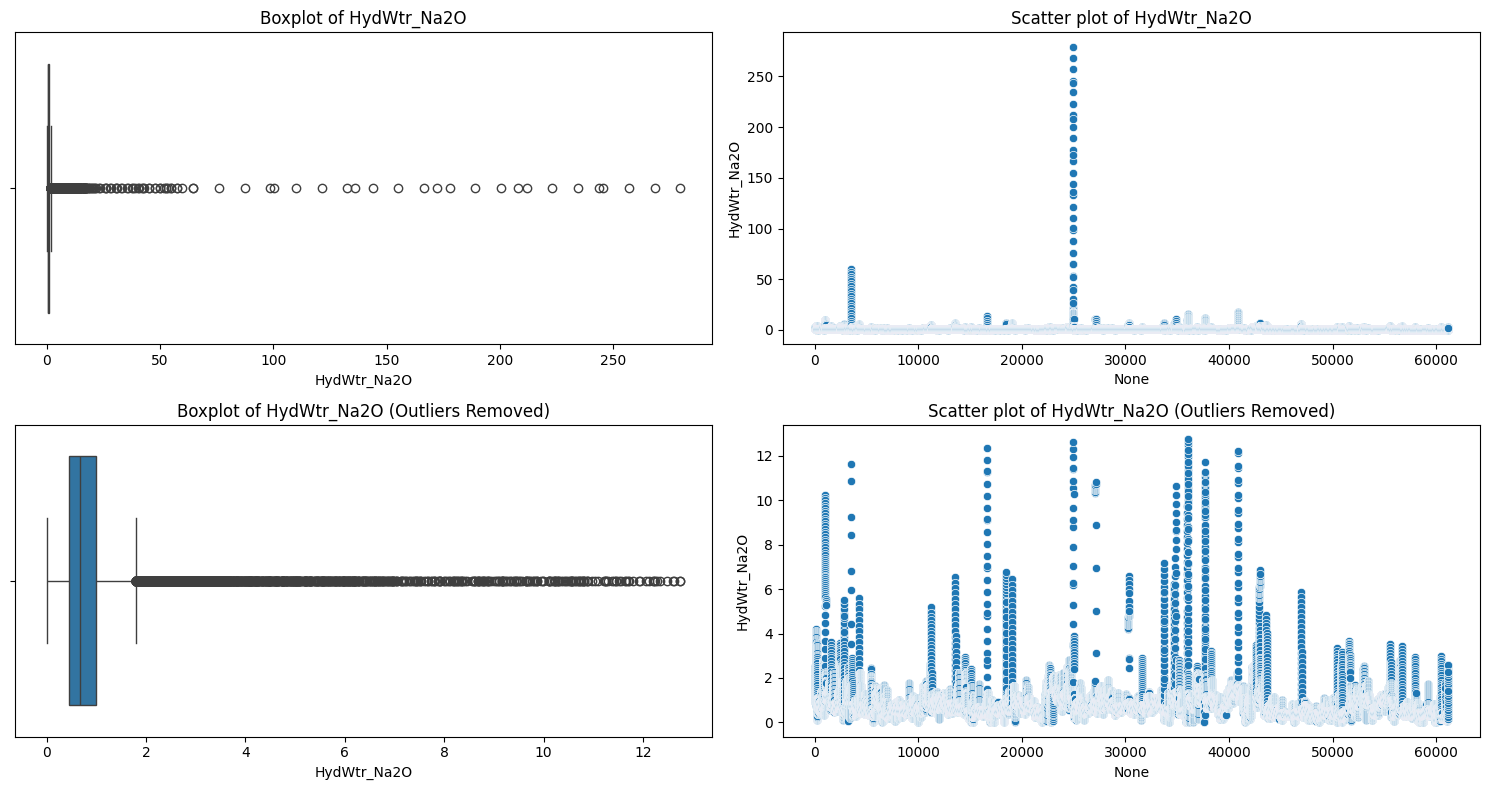

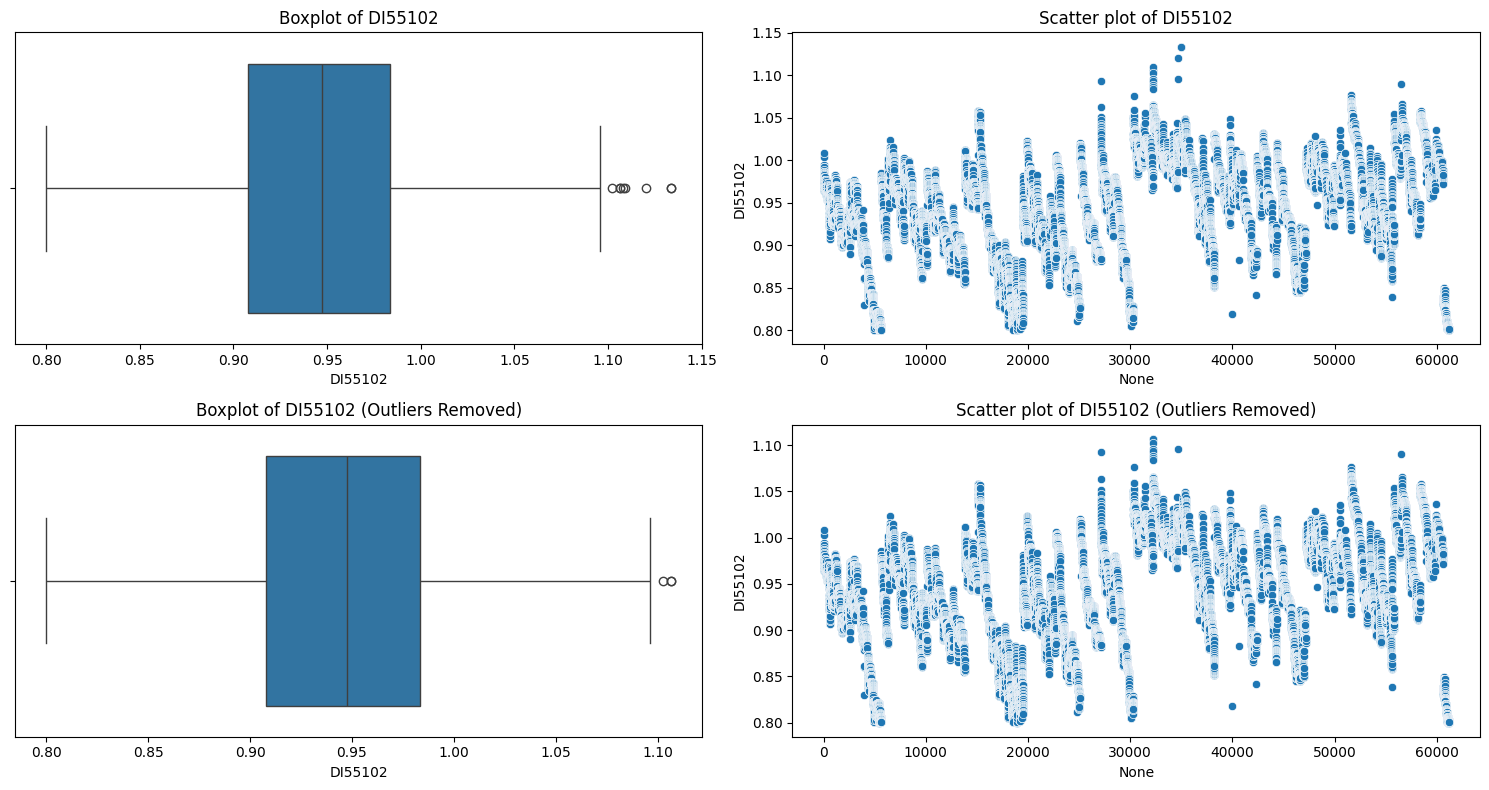

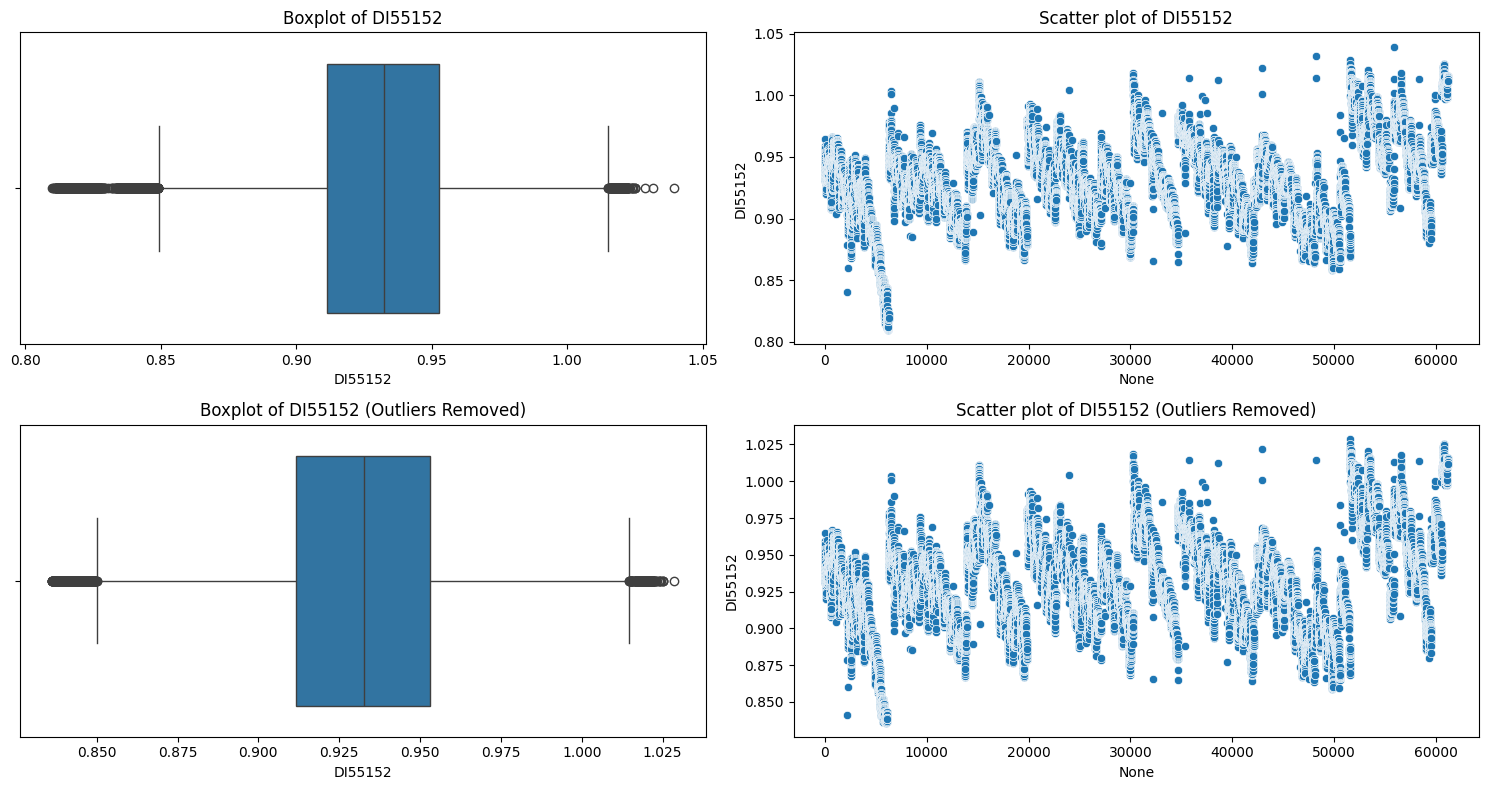

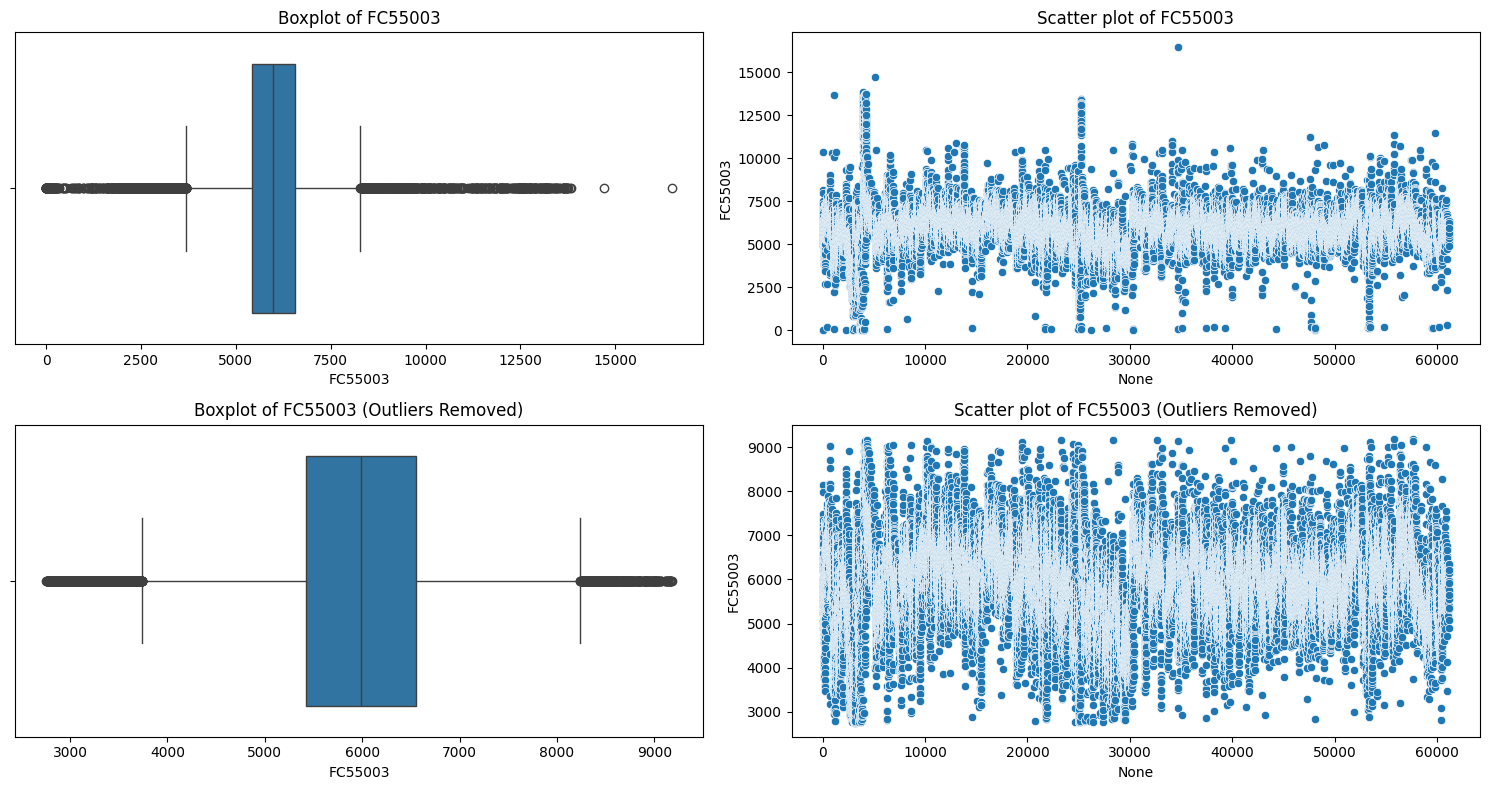

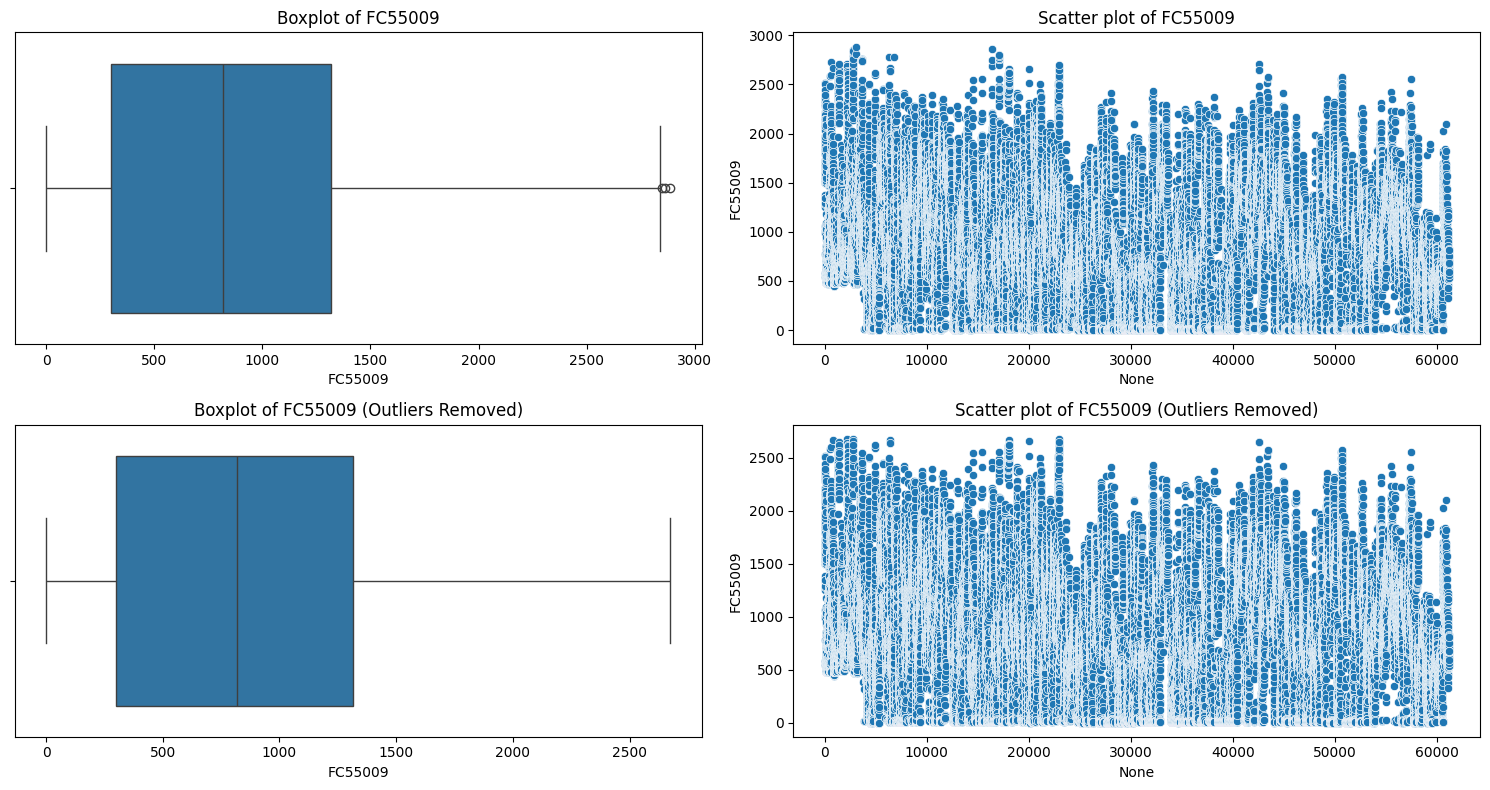

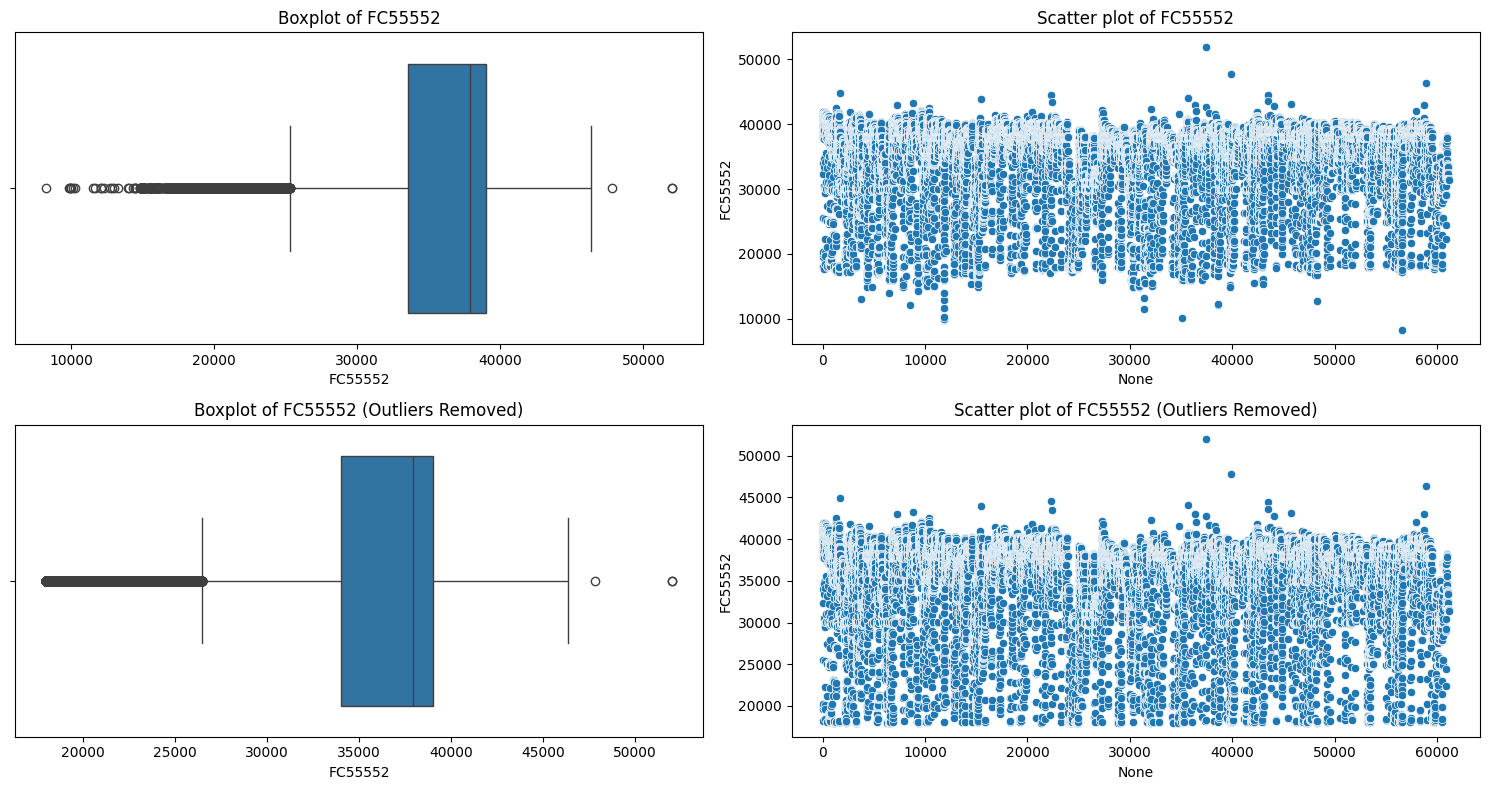

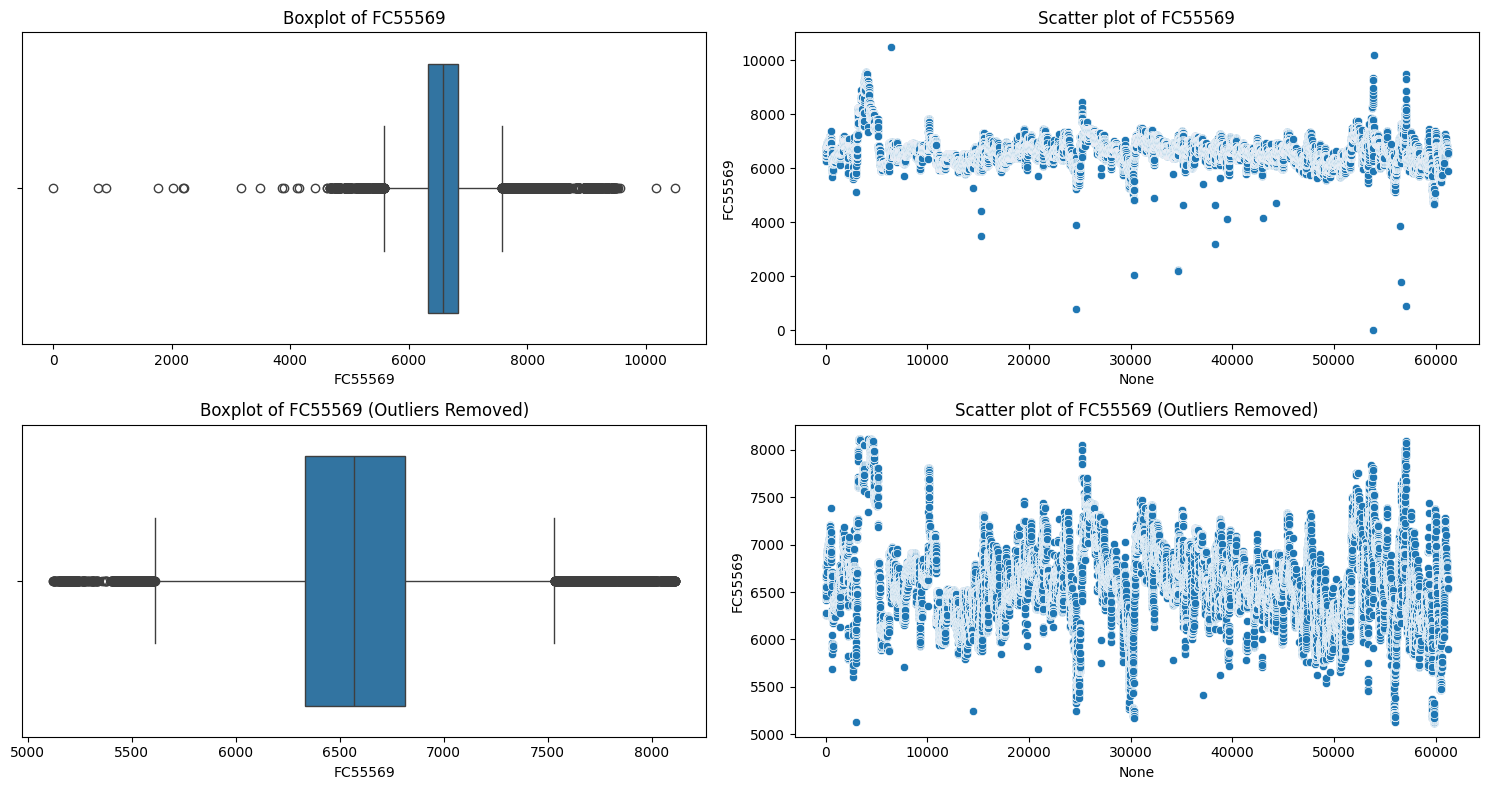

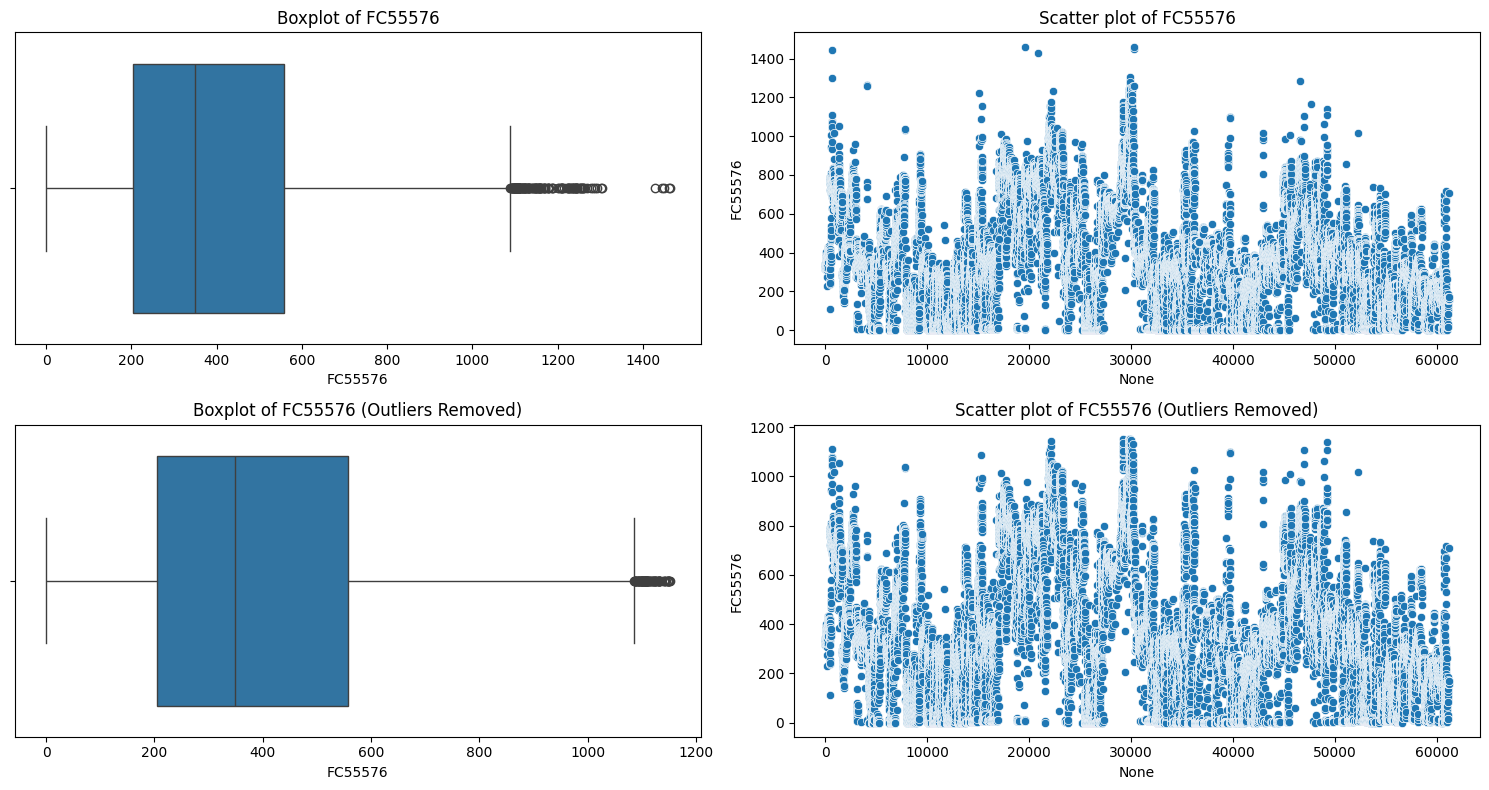

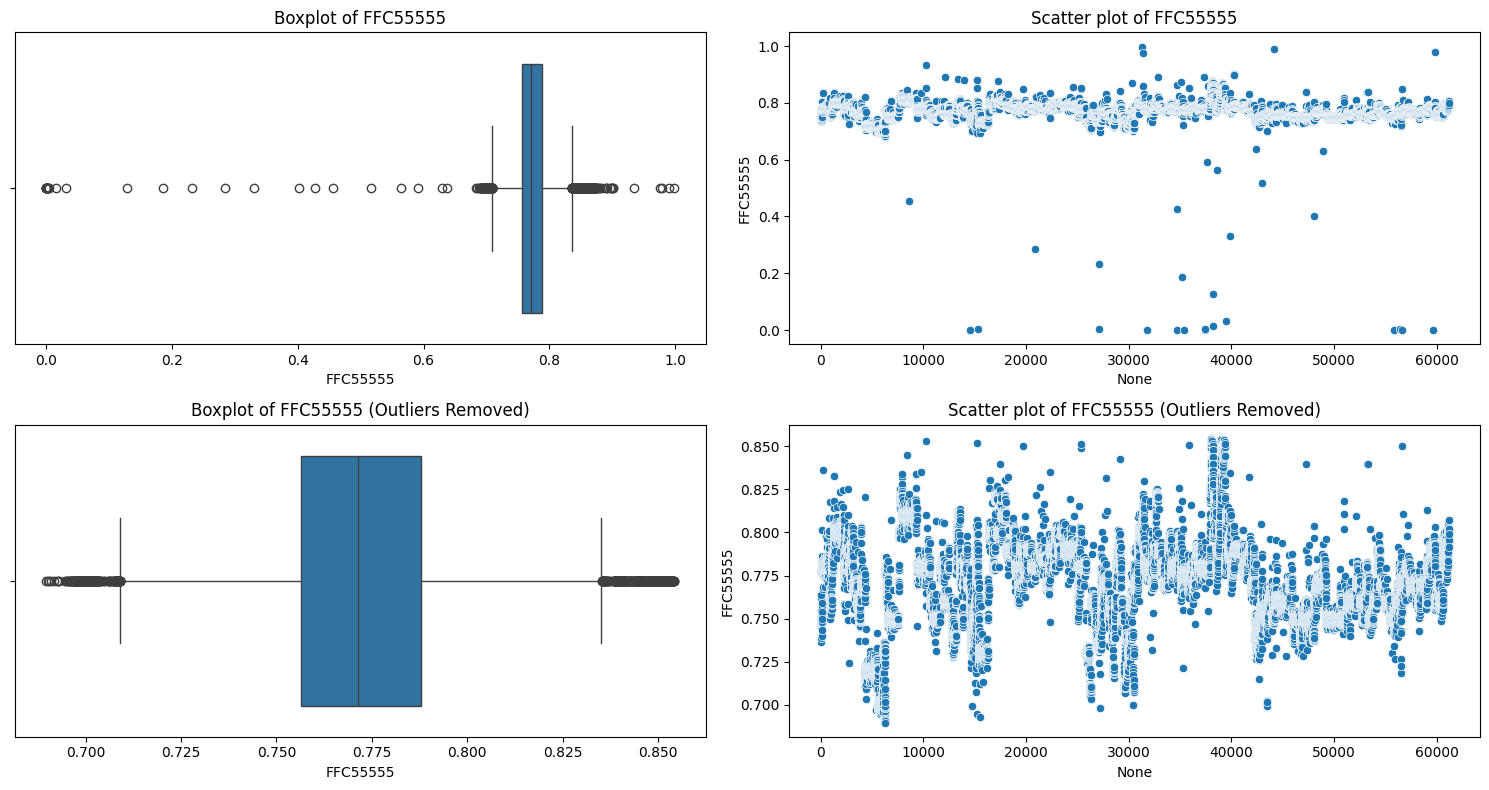

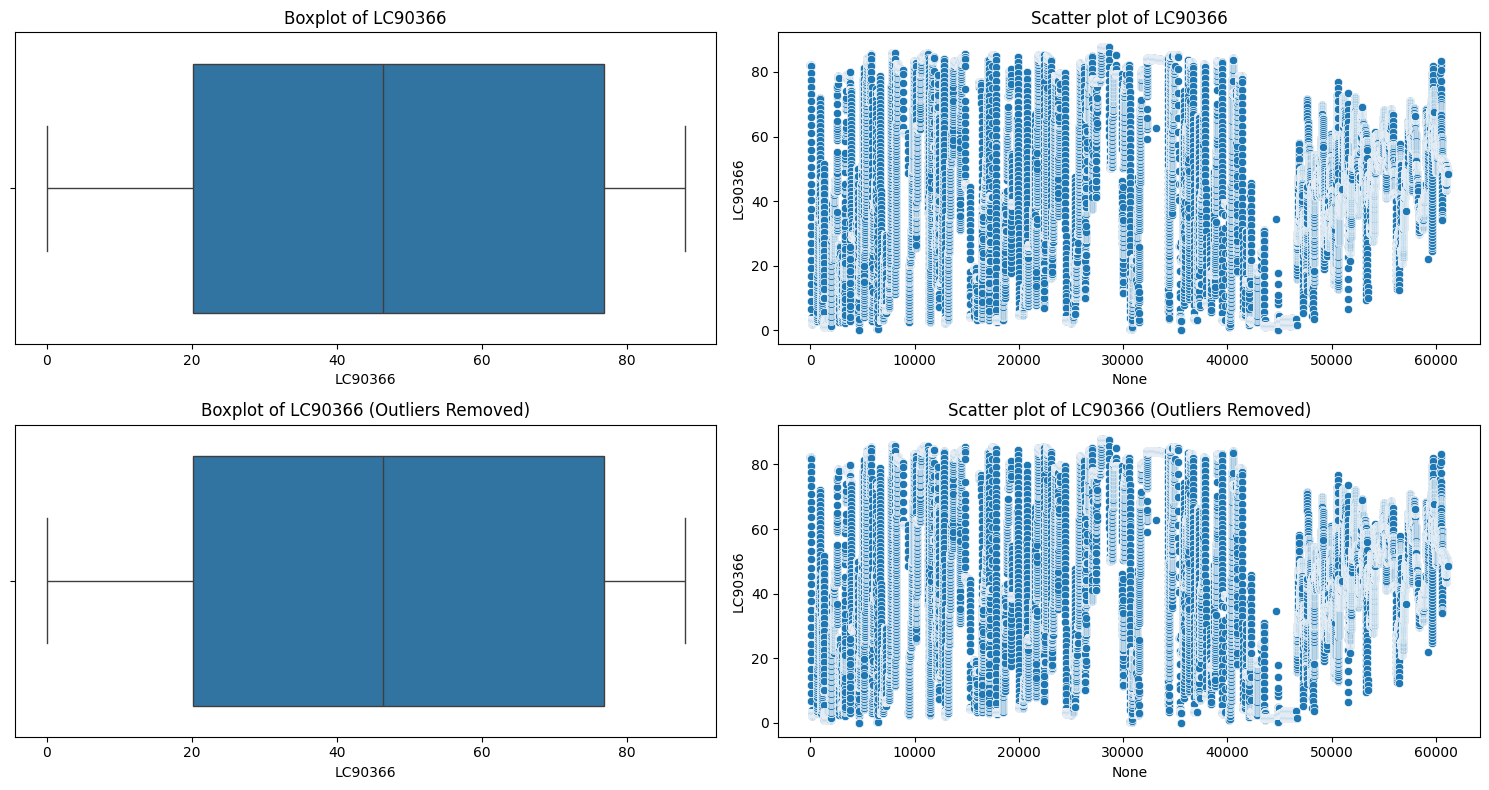

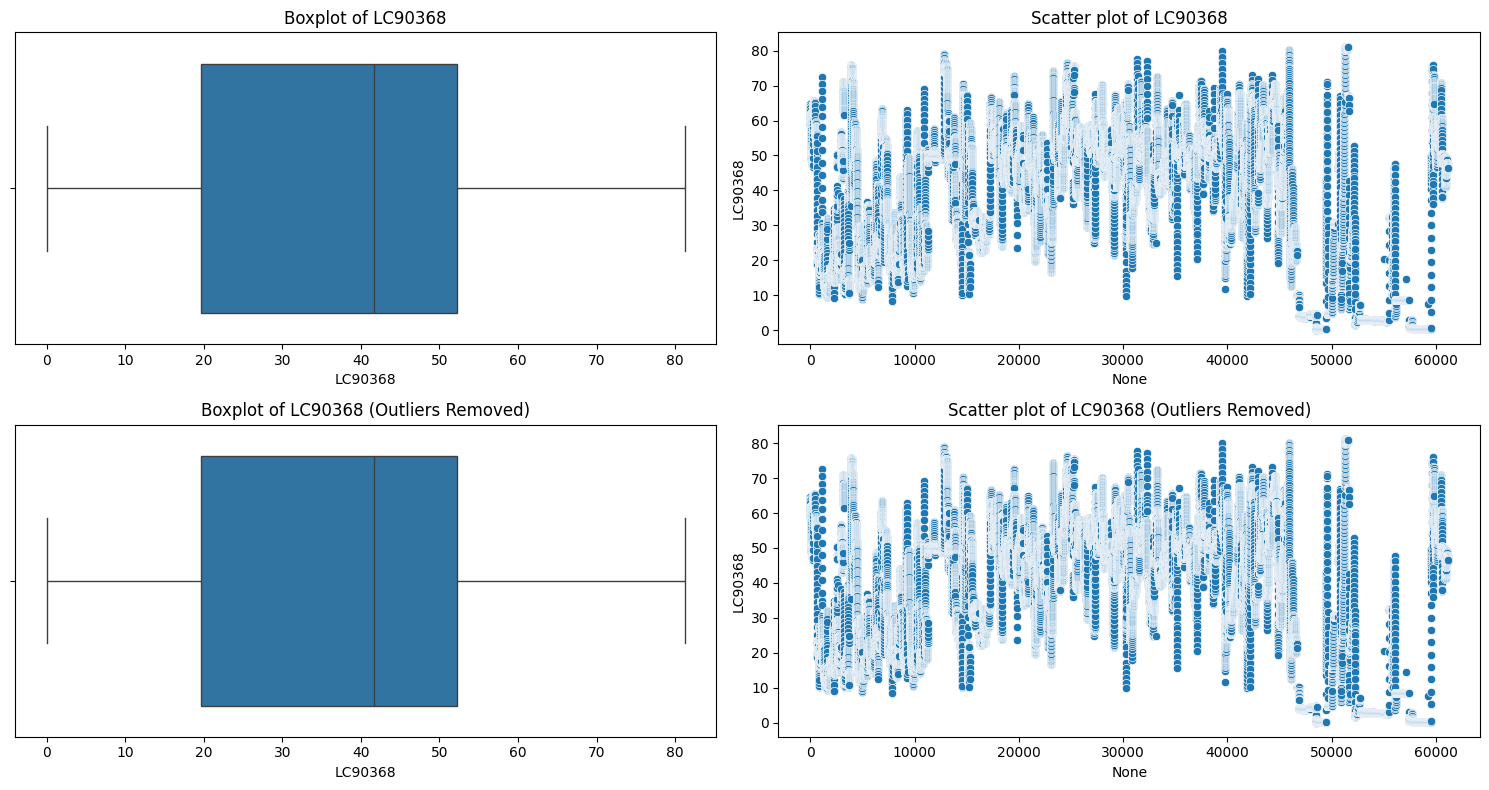

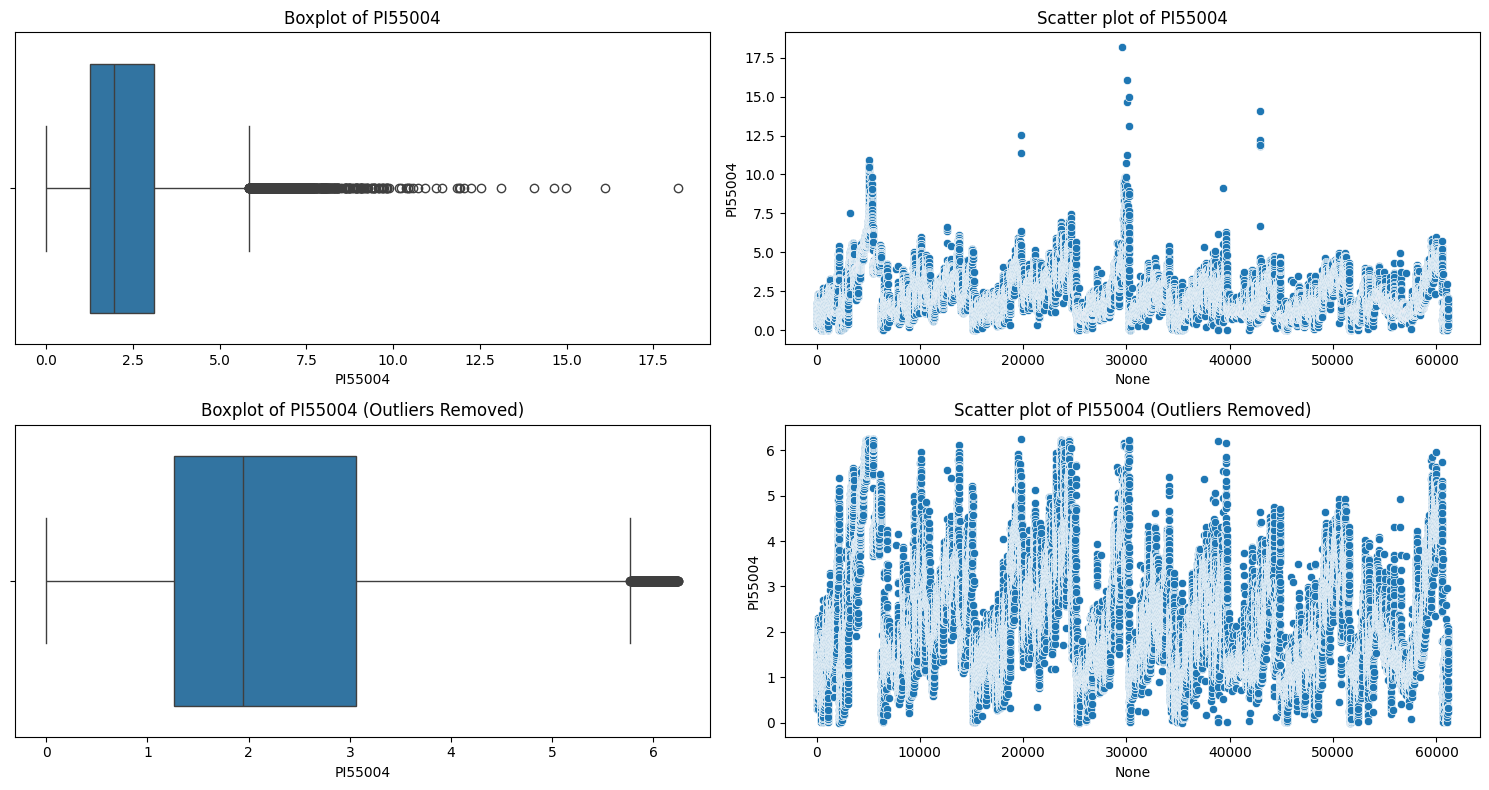

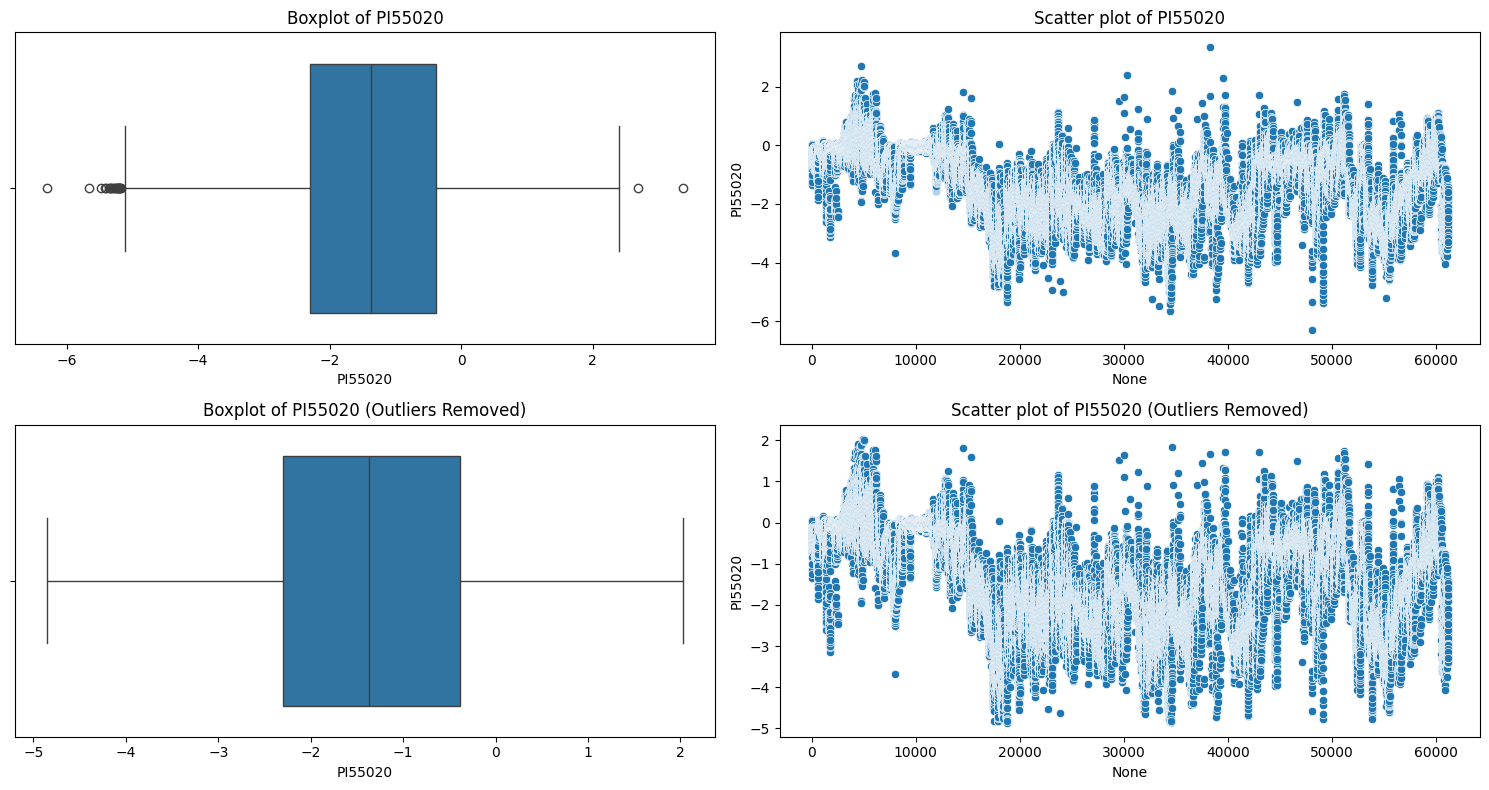

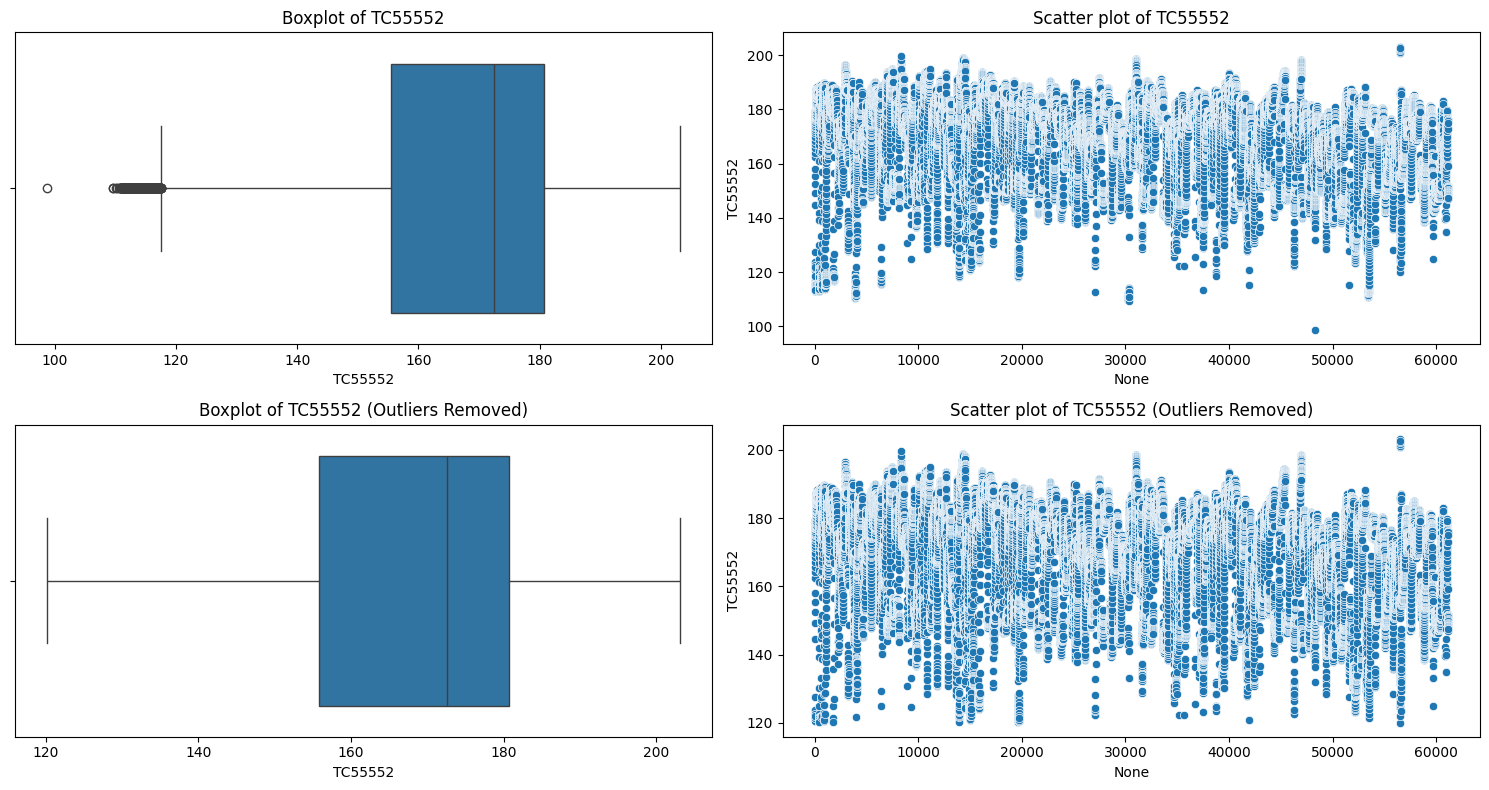

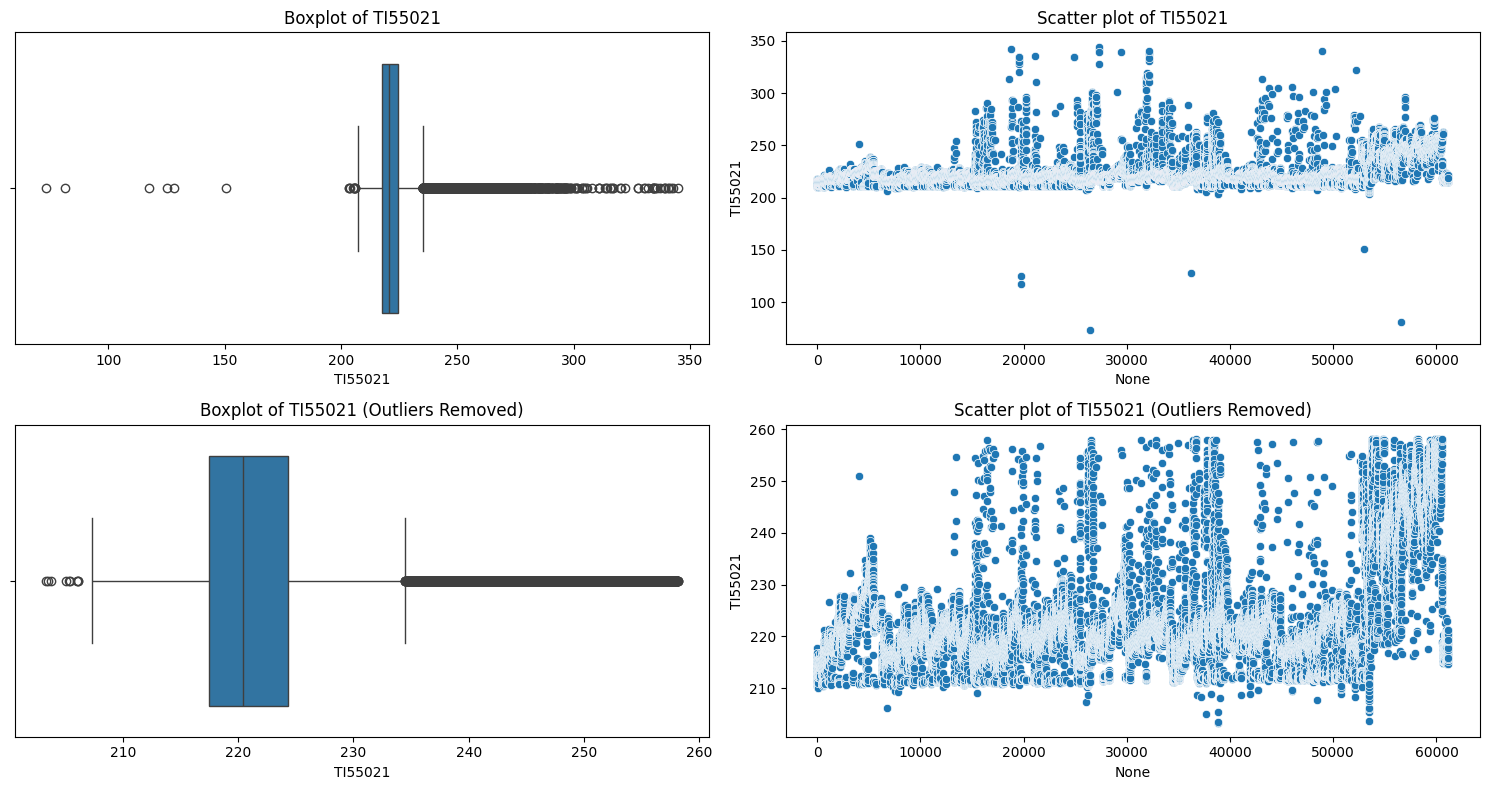

In [34]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [35]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [36]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [37]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       61159          60662        497        0.812636
1           C4_pct_Eth       61159          60998        161        0.263248
2           C4_pct_H2O       61159          60659        500        0.817541
3              Decanol       61159          60385        774        1.265554
4   HydWtr_pct_Ammonia       61159          59958       1201        1.963734
5          HydWtr_Na2O       61159          61032        127        0.207655
6              DI55102       61159          61154          5        0.008175
7              DI55152       61159          60801        358        0.585359
8              FC55003       61159          60262        897        1.466669
9              FC55009       61159          61102         57        0.093200
10             FC55552       61159          60023       1136        1.857454
11             FC55569       61159          59951       1208        1.975179

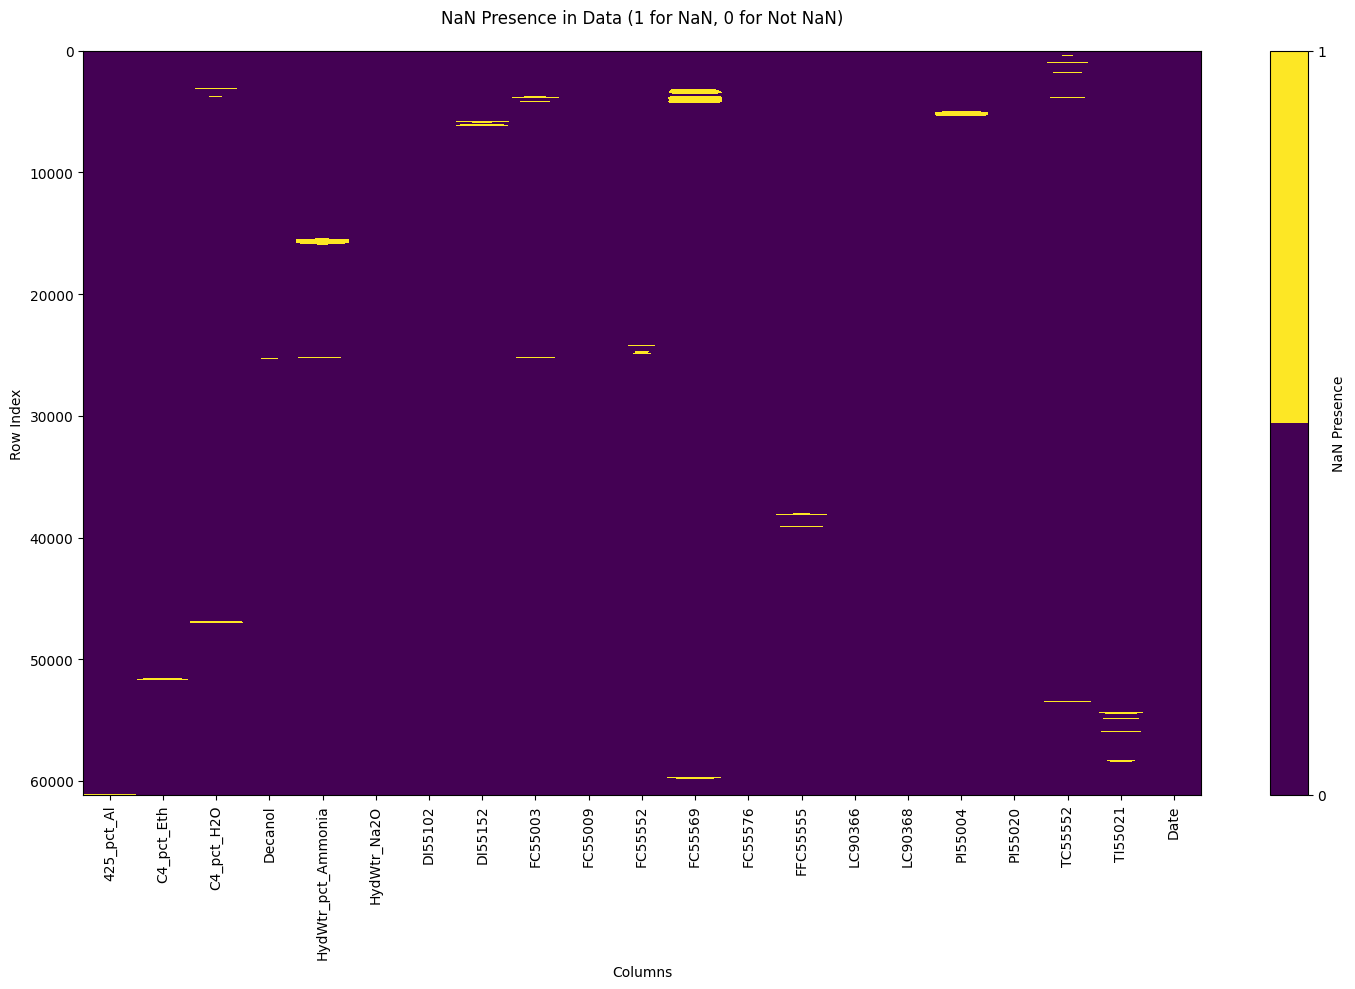

In [38]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [39]:
df_outlierHandling = df_outlierHandling.dropna().copy()



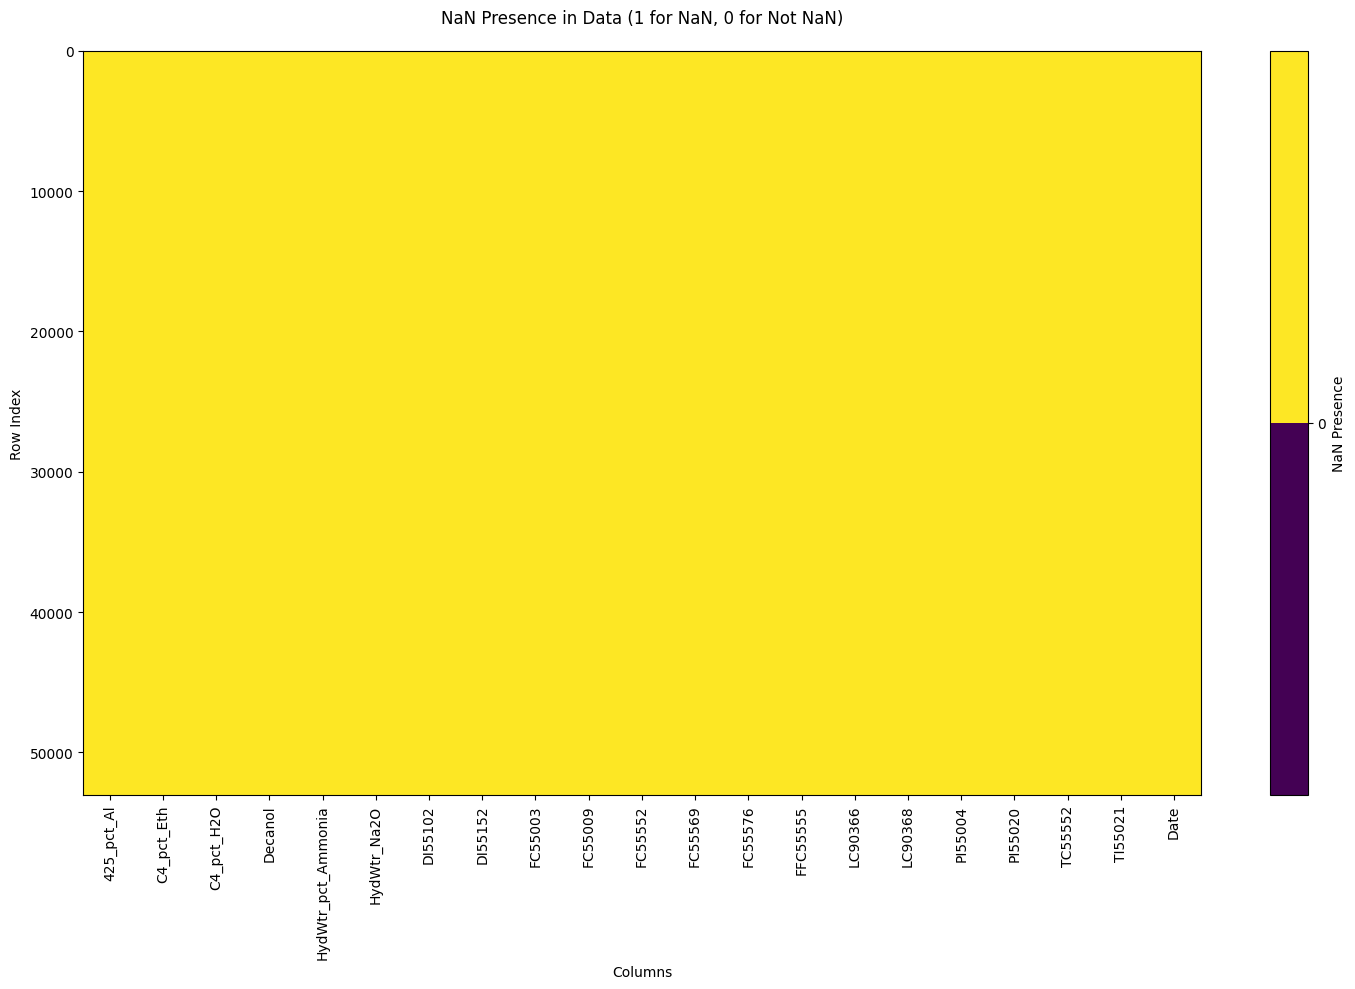

In [40]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [41]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       53027          53027          0             0.0
1           C4_pct_Eth       53027          53027          0             0.0
2           C4_pct_H2O       53027          53027          0             0.0
3              Decanol       53027          53027          0             0.0
4   HydWtr_pct_Ammonia       53027          53027          0             0.0
5          HydWtr_Na2O       53027          53027          0             0.0
6              DI55102       53027          53027          0             0.0
7              DI55152       53027          53027          0             0.0
8              FC55003       53027          53027          0             0.0
9              FC55009       53027          53027          0             0.0
10             FC55552       53027          53027          0             0.0
11             FC55569       53027          53027          0             0.0

In [42]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 21


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [43]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [44]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'Decanol',
       'HydWtr_pct_Ammonia', 'HydWtr_Na2O', 'DI55102', 'DI55152', 'FC55003',
       'FC55009', 'FC55552', 'FC55569', 'FC55576', 'FFC55555', 'LC90366',
       'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TI55021', 'Date'],
      dtype='object')

In [48]:
saoSelect = ['Date', '425_pct_Al', 
            #  'Al2O3', 'M_Value', 
             'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia', 
            #  'C4_pct_Hex', 
             'HydWtr_Na2O']

fb554Select = ['Date',  'Decanol',
            #    'Butanol', 'Ethanol', 'Hexanol', 'Octanol'
               ]

unitSelect = ['Date', 
    #           'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TI55021',

#               'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TC55555', 'TI55021', 'TC55555',

#               'DI55102', 'DI55152', 'DI55580', 'FC42428',
#               'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
#               'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
#               'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555',


            #   'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428', 'FC52018',
            #   'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
            #   'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 
            #   'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
            #   'PI55560', 'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
            #   'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
            #   'TI55023','VI52558B'
              
              # 'AYC55580', 'DI55580', 'FC42428', 'FC52018', 'FC55102', 'FC55152', 'FC55555', 'FFC55553', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'PI55560', 'TC52015', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55023', 'VI52558B'
'DI55102', 
'DI55152', 
'FC55003', 
'FC55009', 
'FC55552', 
'FC55569', 
'FC55576', 
'FFC55555', 
'LC90366', 
'LC90368', 
'PI55004', 
'PI55020', 
'TC55552', 
'TI55021', 

              ]





df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - ['Date']*2:", num_columns_total-2)


Number of features: 23
Number of features - ['Date']*2: 21


In [49]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [50]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_unitData_clean.csv', index=False)

In [51]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-03-21 21:48:16.990734
